## Final Project Submission

Please fill out:
* Student name: graffin kiprotich



# 1. a. INTRODUCTION

In this project am supposed to research, clean and use explolatory skills on the dataset I have been provided with.

## 1. b. Problem Statement
   In this project I plan on analyzing the datasets that I have been provided and plan to use it on finding how risky aircrafts are,
what are the factors around aircraft accidents, countries they occured. The datasets I have contain the make and model of the aircrafts,
the countries and weather conditions where the accidents occured. I'll be using the AviationData.csv and USState_Codes.csv datasets

## 1. c. Main Objective
   The main objective of this project is to analyze the datasets and find the aircrafts that are prone to accidents.
   
## 1. d. Specific Objective
    1. To find the top 5 aircrafts that are prone to accidents?
    2. What is some reason the planes went down?
    3. Does the engine type matter?
    4. Which category is more prone to the accidents?


##  1.e. The data was sourced from kaggle.com but was collected by National Transport and safety board
#### Attributes
    The dataset # 1. e. Data Understandinghas 30 columns and 88889 rows. The columns are as follows:
    'Investigation.Type', - looks if the investigation is an accidental investigation
     'Accident.Number', - number of case
     ircraft.damage', - damage sustained by the aircraft
        'Aircraft.Category',- category of the airplane
       'Registration.Number', - registration code for the air plane
       'Make', - Main company of the aircraft
       'Model', - model of the aircraft
       'Amateur.Built', - was aircraft made by an amateur?
       'Number.of.Engines',- number of engines the aircraft contained
        'Engine.Type', - type of engine contained in the aircraft
        'FAR.Description', - 
         'Schedule',
       'Purpose.of.flight', - what was flight used for
       'Air.carrier', 
       'Total.Fatal.Injuries', - fatal injuries incurred
       'Total.Serious.Injuries', - serious injuries incurred
        'Total.Minor.Injuries', - minor injuries incurred
         'Total.Uninjured', -uninjured scenarios
       'Weather.Condition', -weather occuring on accident day
        'Broad.phase.of.flight', 
        'Report.Status',
       'Publication.Date','Event.Date', - Day accident happened
      'Location', - loaction the accident occured
       'Country', - country accident occured
       'Latitude', 
       'Longitude', 
       'Airport.Code', - airport number where accident occured
        'Airport.Name', - name of the airport
       'Injury.Severity', - depth of injuries sustained
       'A
      
   
   

## 2. READING THE DATA

In [4]:
# first I'll import modules I'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [6]:
#loading the datasets
aviation_df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
aviation_df



C:\Users\griff\AppData\Local\Temp\ipykernel_19148\3783797938.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## 3. CHECKING DATA

In [11]:
#determining number of records
aviation_df.shape

(88889, 31)

In [12]:
#checkikng for the first 5
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
#checking for the last 5
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,12/29/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [14]:
#checking for datatypes
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## 4. EXTERNAL SOURCE VALIDATION

In [16]:
# Run this cell without changes

# There should be 88889 rows
assert aviation_df.shape[0] == 88889

# There should be 30 columns. If this fails, make sure you got rid of
# the extra index column
assert aviation_df.shape[1] == 31

## 5. TIDYING DATASET

In [17]:
#let's look at the columns
aviation_df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [18]:
#the event is not seeing as a column let's add it
aviation_df = aviation_df.reset_index(drop=True)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [19]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


#### completeness
   We are checking for null values in the columns

In [20]:
#let's look for the null objects
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [21]:
#lets drop some columns which aren't beneficial to us
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Location',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 'Registration.Number', 'Amateur.Built',
                   'Publication.Date', 'Country', 'Report.Status', 'Schedule', ]
aviation_df1 = aviation_df.drop(columns=columns_to_drop)


In [22]:
#I noticed that in the make column, there is cessna and Cessna let's clean it here
aviation_df1['Make'] = aviation_df1['Make'].str.replace('CESSNA', 'Cessna')
aviation_df1['Make'] = aviation_df1['Make'].str.replace('cessna', 'Cessna')

In [23]:
aviation_df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [24]:
#let's drop rows with missing values
missing_values = aviation_df1.isnull().sum()
subset_col = list(missing_values[missing_values > 1000].index)
aviation_df1.dropna(subset=subset_col, inplace=True)

In [25]:
aviation_df1.isnull().sum()

Event.Id                   0
Investigation.Type         0
Accident.Number            0
Event.Date                 0
Injury.Severity           11
Aircraft.damage            0
Aircraft.Category          0
Make                       7
Model                     16
Number.of.Engines          0
Engine.Type                0
Purpose.of.flight          0
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          0
dtype: int64

In [26]:
dupped=['Injury.Severity','Model','Make']
for i in dupped:
        aviation_df1[i].fillna(aviation_df1[i].mode()[0],inplace=True)
aviation_df1.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [27]:
aviation_df2 = aviation_df1.copy()
aviation_df2.groupby(['Aircraft.Category'])
aviation_df2.head()
#just ignore it's an experiment LOL

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
7,20020909X01562,Accident,SEA82DA022,1/1/1982,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
8,20020909X01561,Accident,NYC82DA015,1/1/1982,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
12,20020917X02148,Accident,FTW82FRJ07,1/2/1982,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC
13,20020917X02134,Accident,FTW82FRA14,1/2/1982,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC
14,20020917X02119,Accident,FTW82FPJ10,1/2/1982,Fatal(1),Destroyed,Airplane,Navion,A,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC


## 6.EXPLORATORY ANALYSIS

In [28]:
num_accidents = aviation_df1.shape[0]
print("Number of accidents:", num_accidents)


Number of accidents: 20372


### univariate


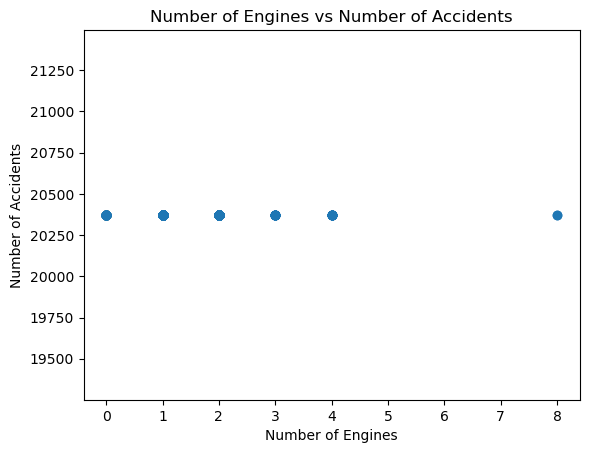

In [29]:
# A scatter plot to visualize the relationship between the number of engines and aircraft damage
plt.scatter(aviation_df1['Number.of.Engines'], [num_accidents] * len(aviation_df1))
plt.ylabel('Number of Accidents')
plt.xlabel('Number of Engines')
plt.title('Number of Engines vs Number of Accidents')
plt.show()

As observed the number of engines doesn't affect the accidents

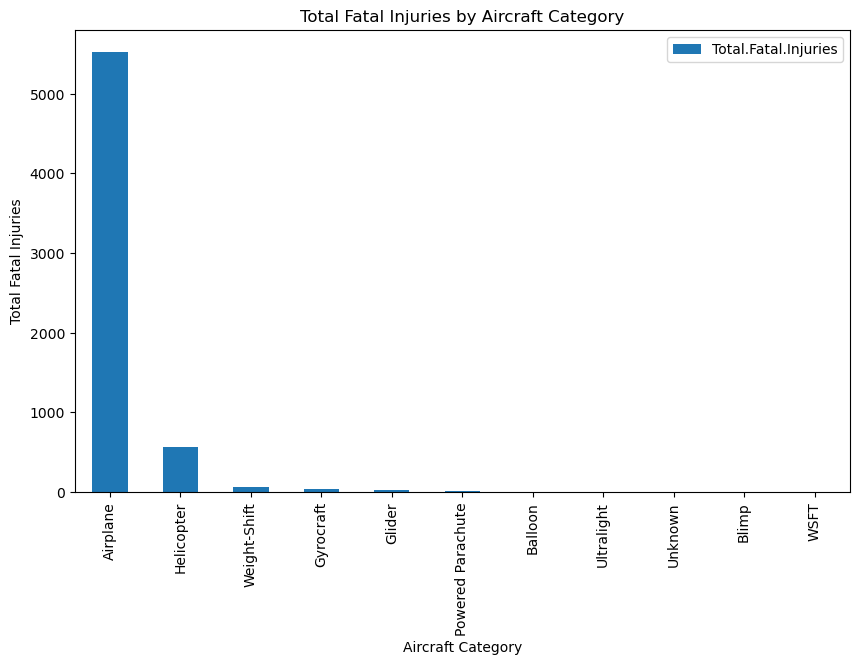

In [30]:
selected_columns = aviation_df1[['Aircraft.Category', 'Total.Fatal.Injuries']]
grouped_df = selected_columns.groupby(['Aircraft.Category']).sum()
sorted_df = grouped_df.sort_values(by='Total.Fatal.Injuries', ascending=False)
sorted_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Category')
plt.title('Total Fatal Injuries by Aircraft Category')
plt.show()

Airplanes are more prone to accidents from this chart

In [31]:
aviation_df1['Injuries'] = aviation_df1['Total.Fatal.Injuries'] + aviation_df1['Total.Serious.Injuries']

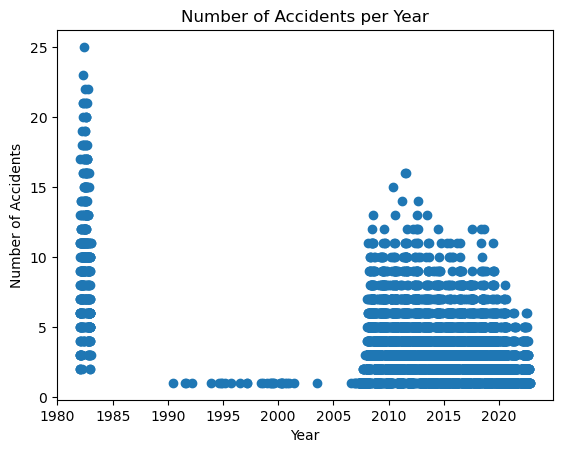

In [32]:
year_accidents_df = aviation_df1['Event.Date'].value_counts().reset_index()
year_accidents_df.columns = ['Year', 'Number of Accidents']
year_accidents_df['Year'] = pd.to_datetime(year_accidents_df['Year'])
year_accidents_df.sort_values(by='Year', inplace=True)

plt.scatter(year_accidents_df['Year'], year_accidents_df['Number of Accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

In [33]:
'''We should really investigate from around the year 2006. There were a lot of incidents'''

'We should really investigate from around the year 2006. There were a lot of incidents'

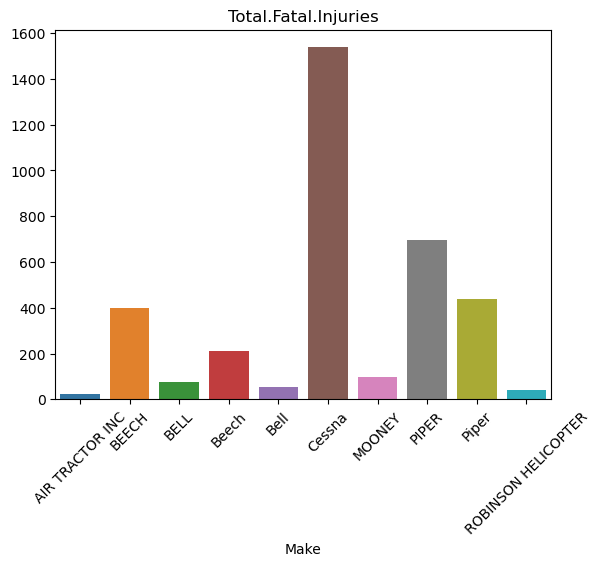

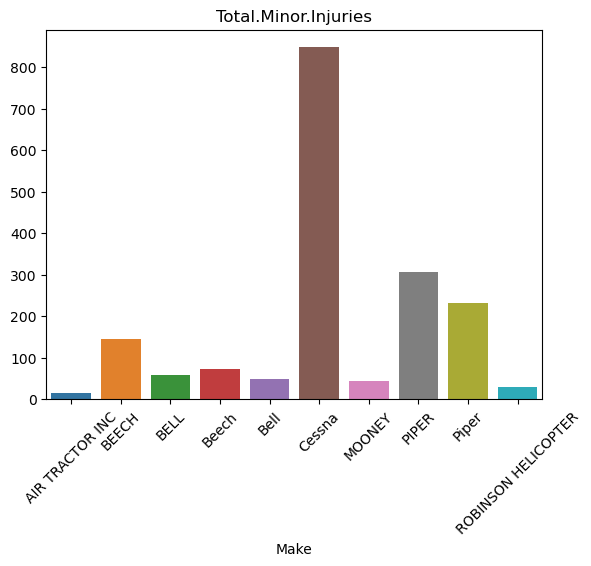

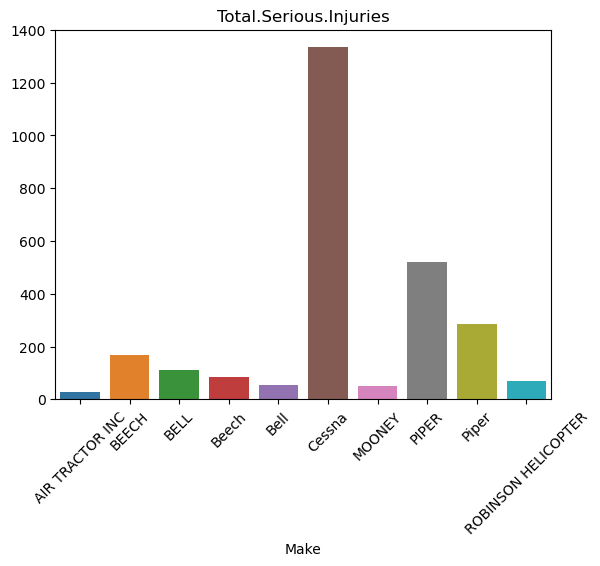

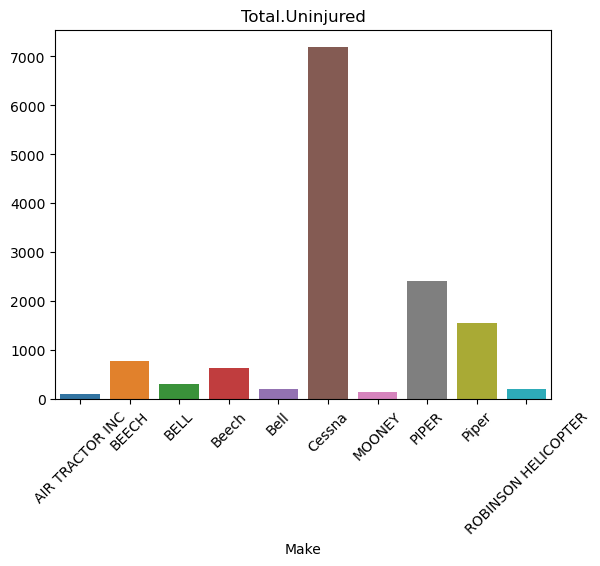

In [34]:
top10_model = aviation_df1['Make'].value_counts().head(10)
# Use the defined variable in the code
Fullinjuries= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_selected = aviation_df1[['Make'] + Fullinjuries]
top_10_make_injuries= df_selected[aviation_df1['Make'].isin(top10_model.index)]
inj_pivot= pd.pivot_table(top_10_make_injuries,values=Fullinjuries,columns='Make',aggfunc='sum')
for i in range(0,len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index,y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    plt.show()

In [35]:
cat_columns = aviation_df1[['Aircraft.Category', 'Make', 'Model', 'Injuries']]
filtered_df = cat_columns[(cat_columns['Aircraft.Category'] == 'Helicopter') & (cat_columns['Injuries'] < 1.0)]
grouped_df = filtered_df.groupby(['Make', 'Model']).sum()
sorted_df = grouped_df.sort_values(by='Injuries', ascending=False)
most_used_models = sorted_df.head(10)
most_used_models

Aircraft.Category  \
Make         Model                                                            
AEROSPATIALE AS 355F1                                            Helicopter   
Hiller       UH12E                                               Helicopter   
Hughes       500D                                                Helicopter   
             500C                                                Helicopter   
             500                                       HelicopterHelicopter   
             369HS        HelicopterHelicopterHelicopterHelicopterHelico...   
             369D (500D)                                         Helicopter   
             369D         HelicopterHelicopterHelicopterHelicopterHelico...   
             369B                                                Helicopter   
             369                                       HelicopterHelicopter   

                          Injuries  
Make         Model                  
AEROSPATIALE AS 355F1          0.0  
Hiller       UH12E             0.0  
Hughes       500D              0.0  
             500C              0.0  
             500               0.0  
             369HS             0.0  
             369D (500D)       0.0  
             369D              0.0  
             369B              0.0  
             369               0.0

In [36]:
cat_columns = aviation_df1[['Aircraft.Category', 'Make', 'Model', 'Injuries']]
filtered_df = cat_columns[(cat_columns['Aircraft.Category'] == 'Airplane') & (cat_columns['Injuries'] <= 1.0)]
grouped_df = filtered_df.groupby(['Make', 'Model']).sum()
sorted_df = grouped_df.sort_values(by='Injuries', ascending=False)
most_used_models = sorted_df.head(10)
most_used_models

Aircraft.Category  \
Make               Model                                                          
Cessna             172        AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
                   152        AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
                   172N       AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
                   150        AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
PIPER              PA28       AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
Cessna             182        AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
                   172M       AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
PIPER              PA-28-140  AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
Cessna             180        AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   
CIRRUS DESIGN CORP SR22       AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...   

                              Injuries  
Make               Model                
Cessna             172            81.0  
                   152            37.0  
                   172N           35.0  
                   150            33.0  
PIPER              PA28           29.0  
Cessna             182            29.0  
                   172M           28.0  
PIPER              PA-28-140      25.0  
Cessna             180            21.0  
CIRRUS DESIGN CORP SR22           21.0

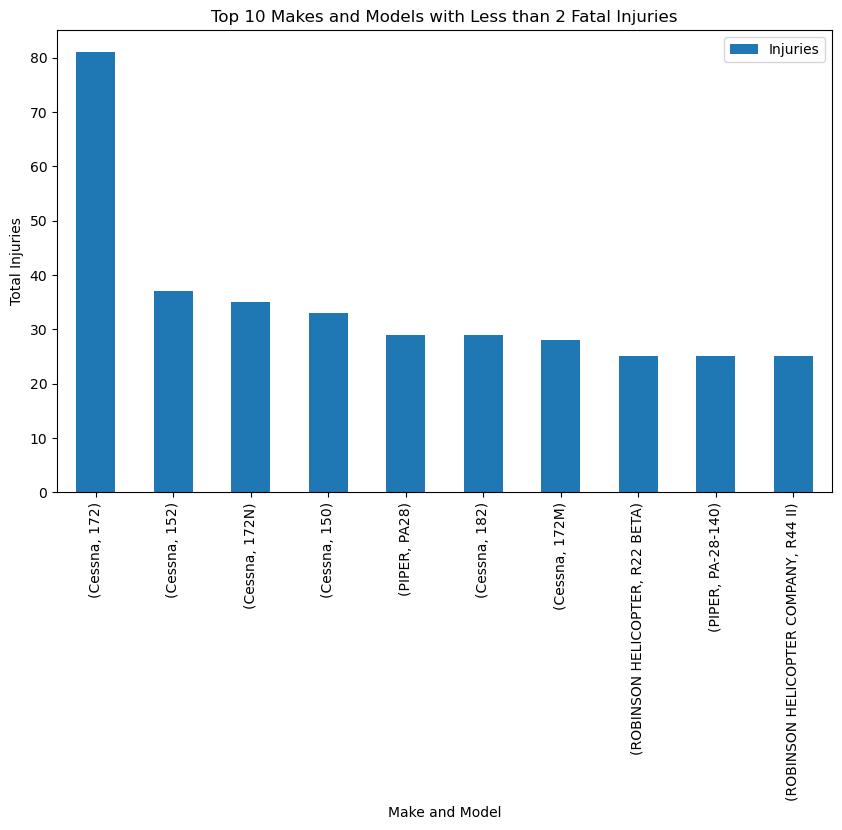

In [37]:
sorted_columns = aviation_df1[['Make', 'Model', 'Injuries']]
filtered_df = sorted_columns[sorted_columns['Injuries'] < 2]
grouped_df = filtered_df.groupby(['Make', 'Model']).sum()
sorted_df = grouped_df.sort_values(by='Injuries', ascending=False)
sorted_df.head(10).plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Injuries')
plt.xlabel('Make and Model')
plt.title('Top 10 Makes and Models with Less than 2 Fatal Injuries')
plt.show()

In [39]:
aviation_df1['Engine.Type'].isnull().sum()

0

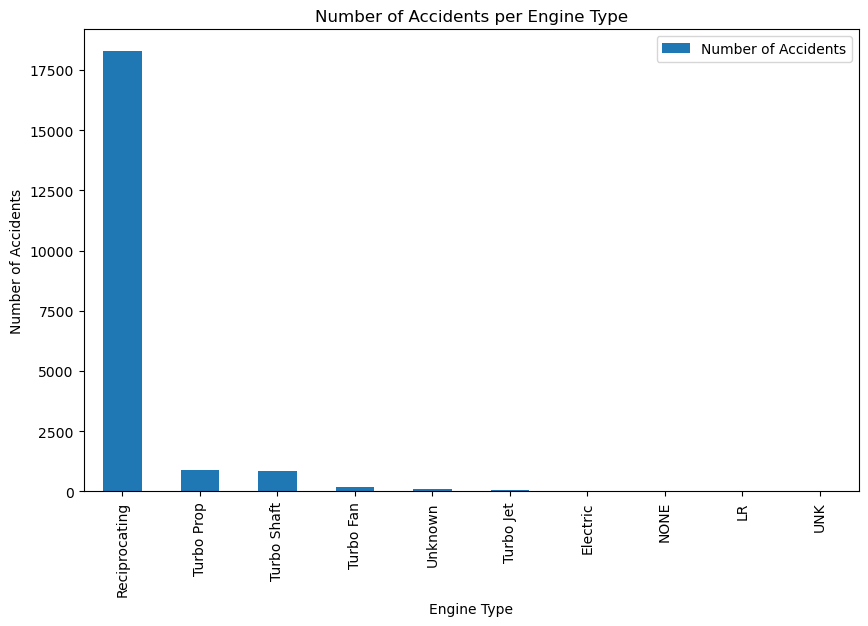

In [40]:
engine_type_accidents_df = aviation_df1['Engine.Type'].value_counts().reset_index()
engine_type_accidents_df.columns = ['Engine Type', 'Number of Accidents']
engine_type_accidents_df.plot(kind='bar', x='Engine Type', y='Number of Accidents', figsize=(10, 6))
plt.ylabel('Number of Accidents')
plt.xlabel('Engine Type')
plt.title('Number of Accidents per Engine Type')
plt.show()

A we can see a reciprocating engine is more prone to accidents compared to the others.

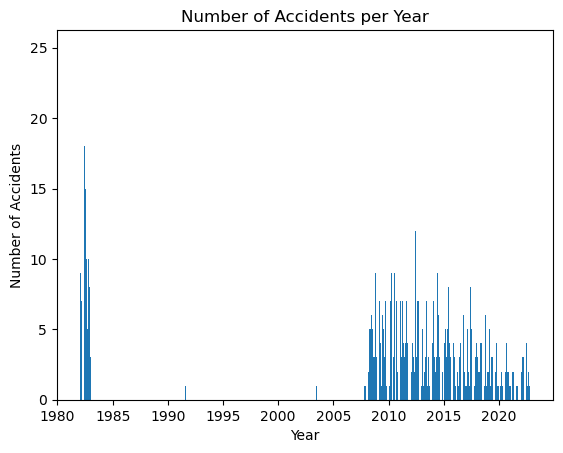

In [41]:
year_accidents_df = aviation_df1['Event.Date'].value_counts().reset_index()
year_accidents_df.columns = ['Year', 'Number of Accidents']
year_accidents_df['Year'] = pd.to_datetime(year_accidents_df['Year'])
year_accidents_df.sort_values(by='Year', inplace=True)

plt.bar(x=year_accidents_df['Year'], height=year_accidents_df['Number of Accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

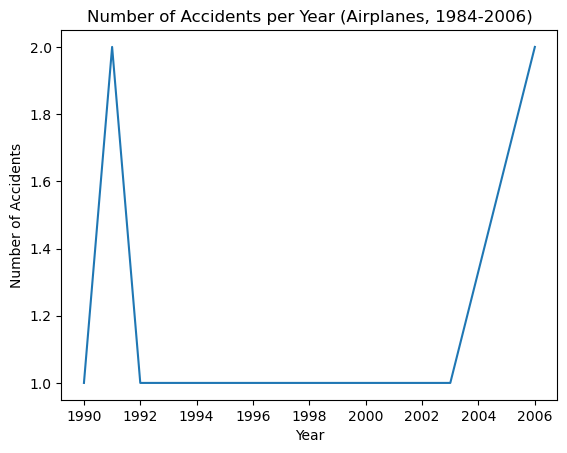

In [43]:
# Converting Event.Date column to datetime type
aviation_df1['Event.Date'] = pd.to_datetime(aviation_df1['Event.Date'])
filtered_df = aviation_df1[(aviation_df1['Aircraft.Category'] == 'Airplane') & (aviation_df1['Event.Date'].dt.year.between(1984, 2006))]
# this is a df thant stores number of accident per year
year_accidents_df = filtered_df['Event.Date'].dt.year.value_counts().reset_index()
year_accidents_df.columns = ['Year', 'Number of Accidents']
year_accidents_df['Year'] = pd.to_datetime(year_accidents_df['Year'], format='%Y')
year_accidents_df.sort_values(by='Year', inplace=True)

plt.plot(year_accidents_df['Year'], year_accidents_df['Number of Accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year (Airplanes, 1984-2006)')
plt.show()

In [44]:
planes_used = filtered_df[['Make', 'Model']].drop_duplicates()
print(planes_used)

                                Make         Model
25965                          Piper     PA-28-180
28791                       Bellanca         7GCBC
28804                          Piper         PA-18
30062                         Fokker       28-4000
34275                          Piper         PA-32
40009              Mcdonnell Douglas         MD-88
50682                          Piper     PA-28-181
54904                         Cessna          182H
61649  Aircraft Mfg & Dev. Co. (amd)  CH601XL SLSA
61787                         Mooney          M20R


In [45]:
''' Ignore the methods down  below, I was looking for an easier list, to copy to my conclusion'''
#the methods am talking about are the ones importing display

' Ignore the methods down  below, I was looking for an easier list, to copy to my conclusion'

In [52]:
from IPython.display import display, HTML
print_output = '''
<h1>Unique Plane Models with Accidents (Airplanes, 1984-2006)</h1>
<ul>
'''
for make, model in zip(planes_used['Make'], planes_used['Model']):
    print_output += f'<li>{make} - {model}</li>\n'

print_output += '''
</ul>
'''
html_output = HTML(print_output)
display(html_output)


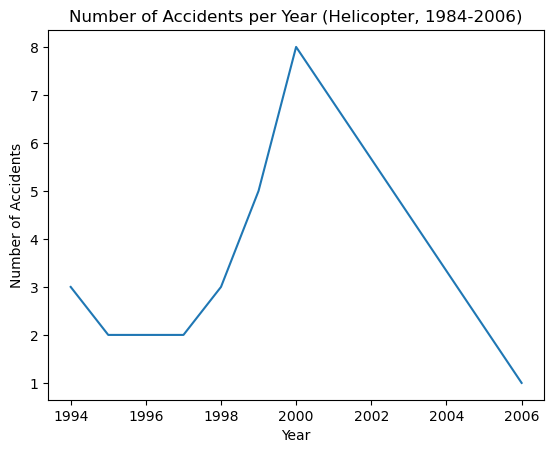

In [54]:
# Converting Event.Date column to datetime type
aviation_df1['Event.Date'] = pd.to_datetime(aviation_df1['Event.Date'])
filtered_df2 = aviation_df1[(aviation_df1['Aircraft.Category'] == 'Helicopter') & (aviation_df1['Event.Date'].dt.year.between(1984, 2006))]
# this is a df thant stores number of accident per year
year_accidents_df = filtered_df2['Event.Date'].dt.year.value_counts().reset_index()
year_accidents_df.columns = ['Year', 'Number of Accidents']
year_accidents_df['Year'] = pd.to_datetime(year_accidents_df['Year'], format='%Y')
year_accidents_df.sort_values(by='Year', inplace=True)

plt.plot(year_accidents_df['Year'], year_accidents_df['Number of Accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year (Helicopter, 1984-2006)')
plt.show()

In [55]:
planes_used1 = filtered_df2[['Make', 'Model']].drop_duplicates()
print(planes_used1)

                                Make        Model
35750                   Aerospatiale       SA316B
36335                        B??lkow      BO-105S
36453                         Agusta     A109A II
36872                           Bell          230
41331                   Aerospatiale      AS-355F
41366                            Mbb      BO-105S
44070                     Eurocopter      AS350BA
44727                           Bell          222
45384                   Aerospatiale    AS-350-BA
45860                            Mbb  B0-105CBS-4
46116                           Bell        222UT
46363                       Sikorsky        S-76A
46624                            Mbb    BK-117-B2
46816                           Bell         206L
47904                           Bell          412
48177                           Bell         222U
48252                     Eurocopter     BK117-A3
48311                     Eurocopter    BK-117-A4
48349                     Eurocopter      AS350B2


In [56]:
print_output = '''
<h1>Unique Plane Models with Accidents (Helicopters, 1984-2006)</h1>
<ul>
'''
for make, model in zip(planes_used1['Make'], planes_used1['Model']):
    print_output += f'<li>{make} - {model}</li>\n'

print_output += '''
</ul>
'''
html_output = HTML(print_output)
display(html_output)


### bivariate

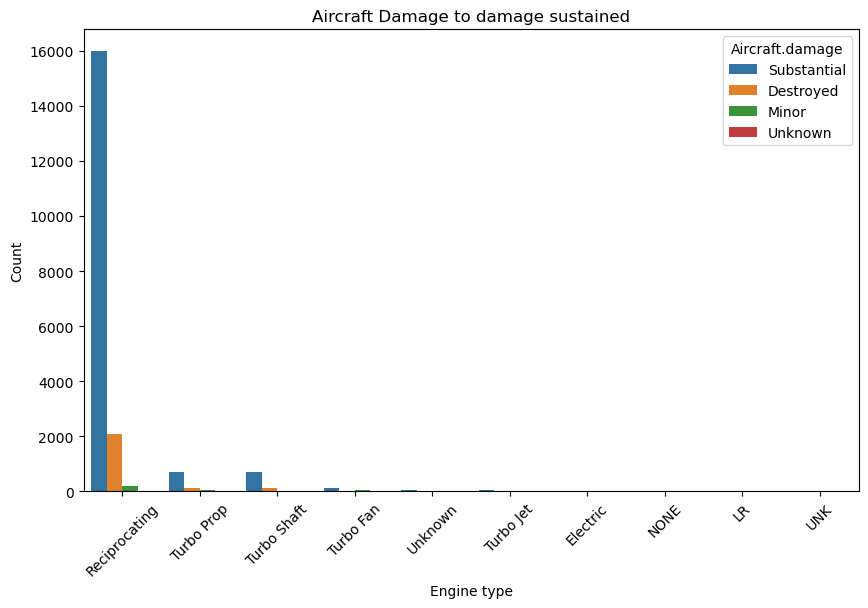

In [57]:
#lets see how airplane damage and engine type relate
fig, ax = plt.subplots(figsize=(10, 6))
order = aviation_df1['Engine.Type'].value_counts().index
sns.countplot(data=aviation_df1, x='Engine.Type', hue='Aircraft.damage', order=order, ax=ax)
ax.set_title('Aircraft Damage to damage sustained')
ax.set_xlabel('Engine type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The reciprocating engine planes received Higher substantial damage and also high destruction damage.

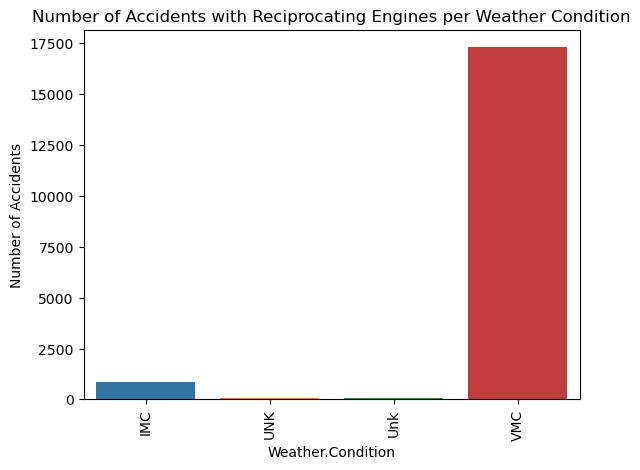

In [58]:
#lets see how weather affects a reciprocating engine shaft
weather_engine_accidents_df = aviation_df1.groupby(['Weather.Condition', 'Engine.Type']).size().reset_index()
weather_engine_accidents_df.columns = ['Weather.Condition', 'Engine Type', 'Number of Accidents']
reciprocating_df = weather_engine_accidents_df[weather_engine_accidents_df['Engine Type'] == 'Reciprocating']
sns.barplot(data=reciprocating_df, x='Weather.Condition', y='Number of Accidents')
plt.xticks(rotation=90)
plt.title('Number of Accidents with Reciprocating Engines per Weather Condition')
plt.show()

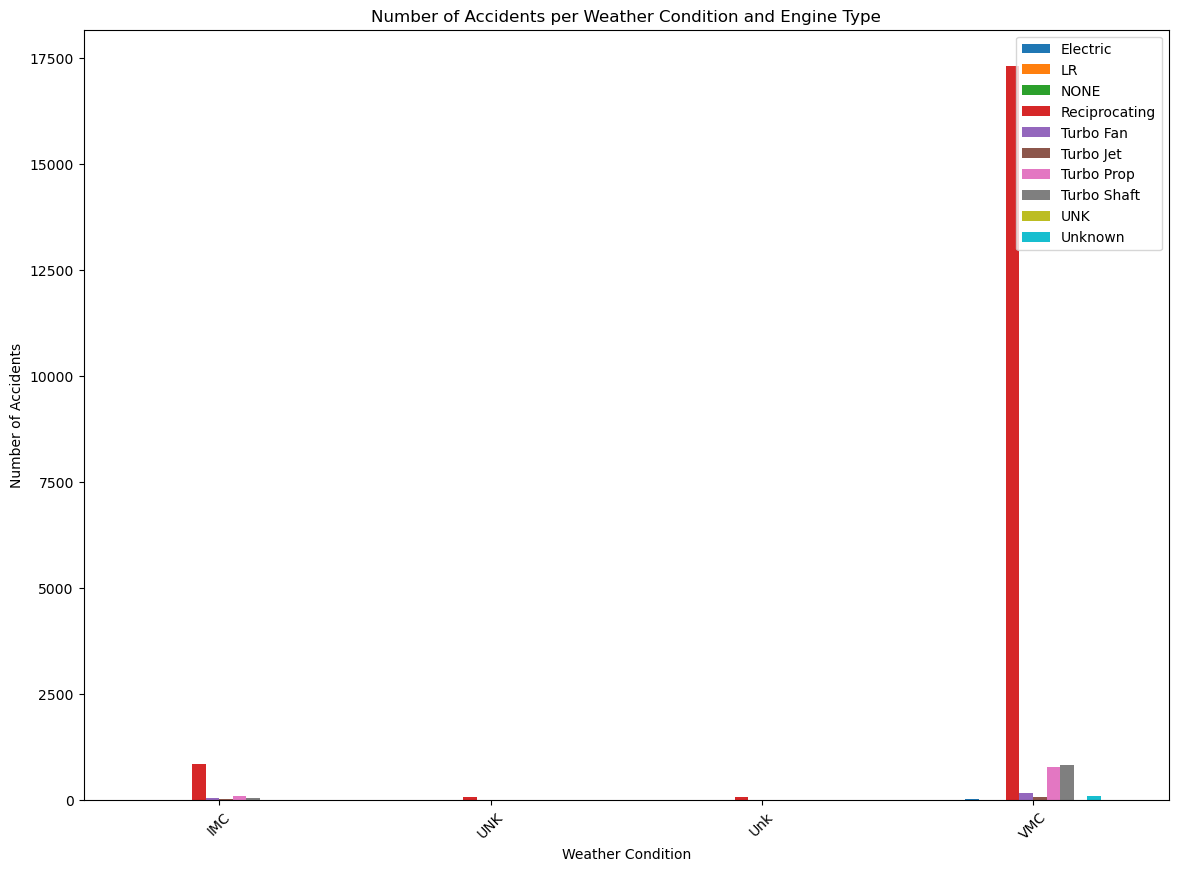

In [59]:
weather_engine_accidents_df = aviation_df1.groupby(['Weather.Condition', 'Engine.Type']).size().reset_index()
weather_engine_accidents_df.columns = ['Weather.Condition', 'Engine.Type', 'Number of Accidents']
pivot_table = pd.pivot_table(weather_engine_accidents_df, values='Number of Accidents', index='Weather.Condition', columns='Engine.Type', fill_value=0)

fig, ax = plt.subplots(figsize=(14, 10))
pivot_table.plot(kind='bar', ax=ax)
ax.set_title('Number of Accidents per Weather Condition and Engine Type')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [60]:
'''so reciprocating engine  can't work well under low visibility'''

"so reciprocating engine  can't work well under low visibility"

## 7. Conclusions
* The planes during the late 90's and early 2000's were involved in minimal accidents
* The cessna model has the highest accidental rates
* Number of engines doesn't affect the planes
* Planes with reciprocating shafts are more prone to accidents
* Helicopters are less prone to accidents compared to airplanes.


## 8. Recommendations
    Based on the exploratory analysis, the following recommendations can be drawn:
  - The most common aircraft category involved in accidents is airplanes.
  - The Cessna make has readily available good models but a high number of accidents.
  - Helicopters have a lower number of accidents compared to airplanes.
  - The number of accidents has been increasing over time, with a notable spike in accidents during the 2010s.
  - There is a positive correlation between the number of engines and the number of accidents for airplanes.
  - Consider investing in more helicopters to reduce the number of accidents and improve overall safety.
  - Monitor the number of accidents over time and adjust safety protocols and training programs as needed.
 	

## 9.Disclaimer
This should not be used for corporate functions as a lot of the data is inadequate. A lot of data needed to start a real airbusiness was missing.